In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from urllib.request import urlopen

In [ ]:
api_key = '8a1cf9d14d53126b05c8a7636fe3d006'
response = urlopen(f'https://financialmodelingprep.com/api/v3/stock/sectors-performance?apikey={api_key}')
sectors = json.loads(response.read().decode("utf-8"))
sectors = pd.DataFrame(sectors['sectorPerformance'])
sectors.changesPercentage = list(map(lambda x: float(x.split('%')[0]), sectors.changesPercentage))

In [91]:
# sns.set_theme()
# plt.rcParams['figure.figsize'] = [20, 10]
# plt.rc('font', size=14)
# fig, ax = plt.subplots()
# ax = sns.barplot(data = sectors, y = 'sector', x = 'changesPercentage', orient = 'h')
# plt.ylabel('Sectors')
# plt.xlabel('Changes Percentage (%)')
# plt.title('Sectors Performance')
# plt.savefig('subSectors_Performance.jpg')
# plt.show()

In [90]:
# main_secs = ['Communication Services', 'Consumer Discretionary', 'Consumer Staples', 'Energy',\
#              'Financials', 'Health Care', 'Industrials', 'Information Technology', 'Materials',\
#              'Real Estate', 'Utilities']
# subsectors = np.unique(sectors.sector)
# print(subsectors)

commu_ser = ['Communication Services', 'Media', 'Telecommunication']
consum_dis = ['Auto Components', 'Automobiles', 'Distributors', 'Diversified Consumer Services',\
              'Hotels, Restaurants & Leisure', 'Leisure Products', 'Textiles, Apparel & Luxury Goods']
consum_sta = ['Beverages', 'Food Products', 'Tobacco']
energy = ['Energy']
fin = ['Banking', 'Financial', 'Financial Services', 'Insurance']
health_care = ['Biotechnology', 'Healthcare', 'Life Sciences Tools & Services', 'Pharmaceuticals']
industrials = ['Aerospace & Defense', 'Airlines', 'Basic Materials', 'Building',\
               'Commercial Services & Supplies', 'Construction', 'Electrical Equipment', 'Industrials',\
               'Logistics & Transportation', 'Machinery', 'Marine', 'Professional Services', 'Road & Rail',\
               'Trading Companies & Distributors', 'Transportation Infrastructure']
############## Construction, Basic Materials, Logistics & Transportation (not sure if they belong to industrials)
info_tech = ['Semiconductors']
materials = ['Chemicals', 'Metals & Mining', 'Packaging', 'Paper & Forest']
real_estate =['Real Estate']
uti = ['Utilities']

##### Services, Retail, Technology (cover multiple sectors)
##### Consumer Cyclical, Consumer Defensive, Consumer products (not sure belong to which sectors)

# print(len(commu_ser + consum_dis + consum_sta + energy + fin + health_care + industrials\
#           + info_tech + materials + real_estate + uti) + 6)
# print(len(subsectors))

In [85]:
main_secs = {'Communication Services': commu_ser, 'Consumer Discretionary': consum_dis,\
             'Consumer Staples': consum_sta, 'Energy': energy, 'Financials': fin,\
             'Health Care': health_care, 'Industrials': industrials,\
             'Information Technology': info_tech, 'Materials': materials,\
             'Real Estate': real_estate, 'Utilities': uti}
sectors['ms'] = np.nan
for sub in sectors.sector:
    for sec in main_secs:
        if sub in main_secs[sec]:
            sectors.loc[sectors['sector'] == sub, 'ms'] = sec

In [87]:
sectors

sector  changesPercentage  \
0                Aerospace & Defense             0.0152   
1                           Airlines            -2.4455   
2                    Auto Components             0.1432   
3                        Automobiles            -0.7300   
4                            Banking            -0.2715   
5                    Basic Materials             1.9100   
6                          Beverages             0.2960   
7                      Biotechnology             0.0485   
8                           Building            -0.1321   
9                          Chemicals             0.2727   
10    Commercial Services & Supplies             0.4146   
11            Communication Services             1.7777   
12                      Construction             0.5593   
13                 Consumer Cyclical             1.9119   
14                Consumer Defensive             1.3346   
15                 Consumer products             0.5293   
16                      Distributors            -0.0343   
17     Diversified Consumer Services            -0.4943   
18              Electrical Equipment             0.7541   
19                            Energy             2.1766   
20                         Financial             1.0568   
21                Financial Services             0.9717   
22                     Food Products             0.7477   
23                        Healthcare             1.2300   
24     Hotels, Restaurants & Leisure            -0.4790   
25                       Industrials             1.2360   
26                         Insurance            -0.1831   
27                  Leisure Products            -0.7194   
28    Life Sciences Tools & Services             1.1556   
29        Logistics & Transportation            -0.0874   
30                         Machinery             0.4066   
31                            Marine             1.6785   
32                             Media             0.1969   
33                   Metals & Mining             0.6916   
34                         Packaging             0.1423   
35                    Paper & Forest            -0.2286   
36                   Pharmaceuticals             0.2117   
37             Professional Services             0.3859   
38                       Real Estate             1.6658   
39                            Retail             0.2464   
40                       Road & Rail             0.4523   
41                    Semiconductors            -0.0103   
42                          Services            -0.1029   
43                        Technology             1.3980   
44                 Telecommunication             1.4243   
45  Textiles, Apparel & Luxury Goods             0.6612   
46                           Tobacco            -0.1922   
47  Trading Companies & Distributors            -0.1122   
48     Transportation Infrastructure             0.4875   
49                         Utilities             0.5343   

                        ms  
0              Industrials  
1              Industrials  
2   Consumer Discretionary  
3   Consumer Discretionary  
4               Financials  
5              Industrials  
6         Consumer Staples  
7              Health Care  
8              Industrials  
9                Materials  
10             Industrials  
11  Communication Services  
12             Industrials  
13                     NaN  
14                     NaN  
15                     NaN  
16  Consumer Discretionary  
17  Consumer Discretionary  
18             Industrials  
19                  Energy  
20              Financials  
21              Financials  
22        Consumer Staples  
23             Health Care  
24  Consumer Discretionary  
25             Industrials  
26              Financials  
27  Consumer Discretionary  
28             Health Care  
29             Industrials  
30             Industrials  
31             Industrials  
32  Communication Services  
33               Materials  
34   

# ETFs

In [60]:
import requests

ETFs = ['XLK','XLV','XLF','XLRE','XLB','XLE','XLY','XLI','XLU','XLP','XLC']
api_key = '8a1cf9d14d53126b05c8a7636fe3d006'

In [68]:
ETF_sec = pd.DataFrame(columns = ['sector', 'changesPercentage'])

for ticker in ETFs:
    res = requests.get(f'https://financialmodelingprep.com/api/v3/quote/{ticker}?apikey={api_key}').json()[0]
    ETF_sec = ETF_sec.append({'sector': res['name'], 'changesPercentage': res['changesPercentage']}, ignore_index=True)

#ETF_sec.changesPercentage = list(map(lambda x: str(x) + '%', ETF_sec.changesPercentage))

display(ETF_sec)

sector  changesPercentage
0               Technology Select Sector SPDR Fund               1.09
1              Health Care Select Sector SPDR Fund               0.02
2                Financial Select Sector SPDR Fund              -1.28
3          The Real Estate Select Sector SPDR Fund              -0.65
4                Materials Select Sector SPDR Fund              -0.80
5                   Energy Select Sector SPDR Fund              -0.63
6   Consumer Discretionary Select Sector SPDR Fund              -0.13
7               Industrial Select Sector SPDR Fund              -0.59
8                Utilities Select Sector SPDR Fund              -0.20
9         Consumer Staples Select Sector SPDR Fund               0.44
10  Communication Services Select Sector SPDR Fund               0.49

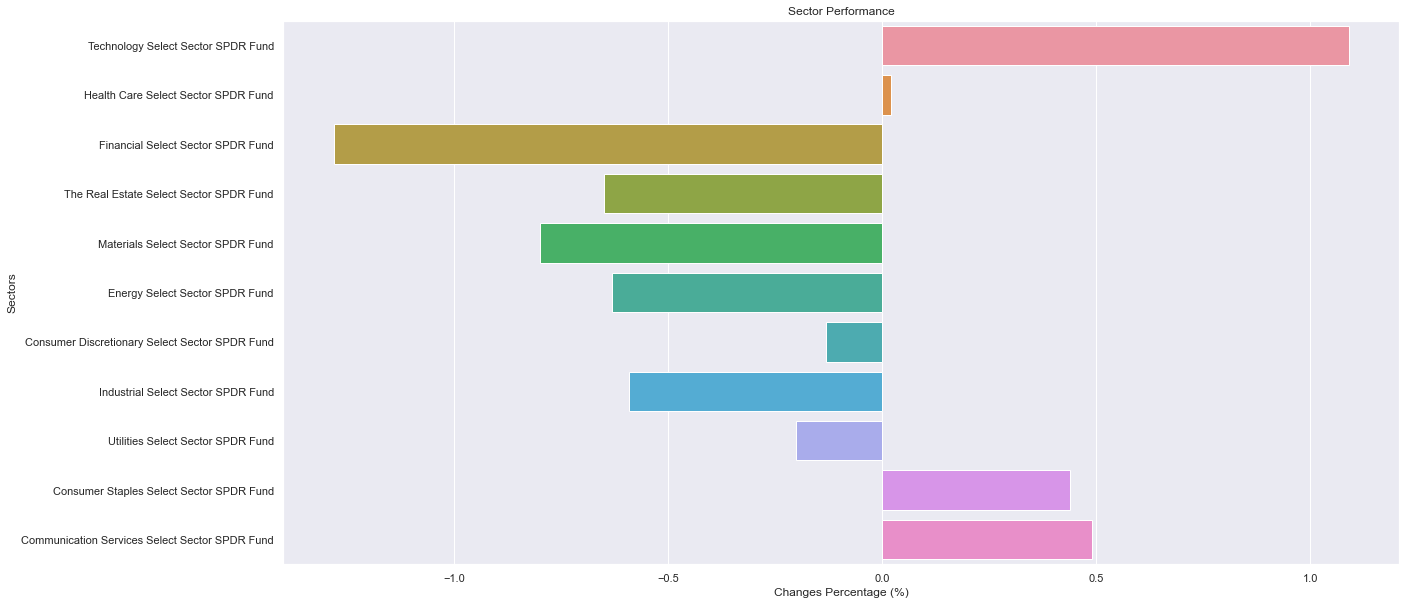

In [69]:
sns.set_theme()
plt.rcParams['figure.figsize'] = [20, 10]
plt.rc('font', size=14)
fig, ax = plt.subplots()
ax = sns.barplot(data = ETF_sec, y = 'sector', x = 'changesPercentage', orient = 'h')
plt.ylabel('Sectors')
plt.xlabel('Changes Percentage (%)')
plt.title('Sector Performance')
plt.savefig('Sector_ETF_Performance.jpg')
plt.show()

In [63]:
requests.get(f'https://financialmodelingprep.com/api/v3/quote/{ms[0]}?apikey={api_key}').json()[0]

{'symbol': 'XLK',
 'name': 'Technology Select Sector SPDR Fund',
 'price': 153.01,
 'changesPercentage': 1.12,
 'change': 1.69,
 'dayLow': 150.94,
 'dayHigh': 153.0306,
 'yearHigh': 153.0306,
 'yearLow': 103.47,
 'marketCap': 41627287552.0,
 'priceAvg50': 143.51529,
 'priceAvg200': 136.67207,
 'volume': 2580716,
 'avgVolume': 6735517,
 'exchange': 'NYSE',
 'open': 151.06,
 'previousClose': 151.32,
 'eps': None,
 'pe': None,
 'earningsAnnouncement': None,
 'sharesOutstanding': 272055993,
 'timestamp': 1626191311}